### Importing the Required Packages for Preprocessing

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import skew, norm

In [77]:
train = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

In [78]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
print(train.shape)
trainlength = len(train)
testlength = len(test)
print(test.shape)

(891, 12)
(418, 11)


### Removing the PassengerId columns as it is redudant feature

In [81]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace = True)

In [82]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Outlier Detection

In [83]:
from collections import Counter

def detect_outliers(df, n, features):
    outliers_index = []  
    for i in features:
        q1 = np.percentile(df[i],25)
        q3 = np.percentile(df[i],75)
        iqr = q3-q1
        
        outlier_step = 1.5*iqr
        
        outlier_list_col = df[(df[i]<q1 - outlier_step) | (df[i]>q3 + outlier_step)].index
        
        outliers_index.extend(outlier_list_col)
        
    outliers_index = Counter(outliers_index)
    multiple_outliers = list(k for k, v in outliers_index.items() if v>n)
    return multiple_outliers
    
outlier_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

In [84]:
train.loc[outlier_to_drop]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [85]:
train = train.drop(outlier_to_drop, axis = 0)

#### Removing the outlier as they seems to deflecting the actual values from the desired results

In [86]:
train.shape
trainlength = len(train)

In [87]:
train['Survived'] = train['Survived'].astype(int)
y_train = train['Survived']
x_train = train.drop('Survived', axis=1)
x_test = test

In [88]:
df = pd.concat([x_train, x_test])

In [89]:
df.shape

(1299, 10)

In [90]:
df = df.fillna(np.nan)
df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          256
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1007
Embarked       2
dtype: int64

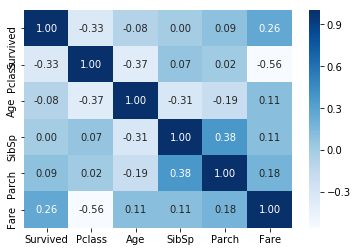

In [91]:
import seaborn as sns
sns.heatmap(train.corr(), annot=True, fmt ='.2f', cmap = 'Blues')

#### From the above correlation plot we can observe that the Age is negatively correlated with the SibSp, Parch and Pclass

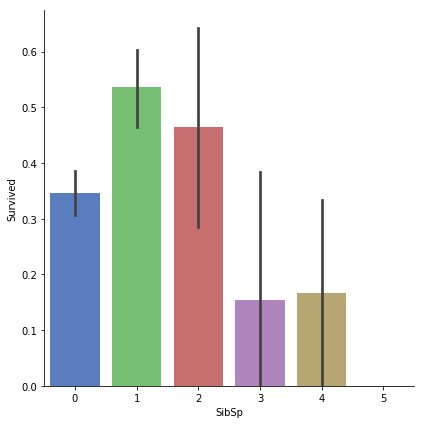

In [92]:
sns.factorplot(x='SibSp', y='Survived', data=train, 
                  kind='bar', size=6, palette = 'muted')

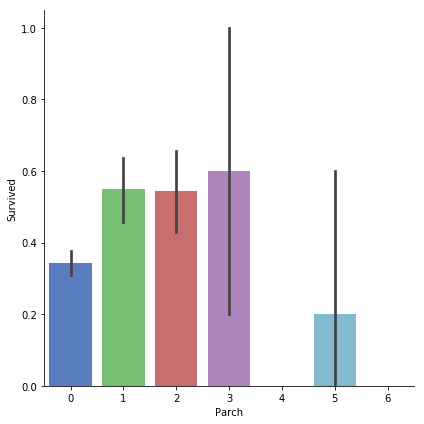

In [93]:
sns.factorplot(x='Parch', y='Survived',data = train,
               kind='bar',size = 6, palette = 'muted')

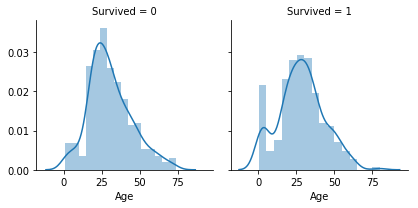

In [94]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, 'Age')

From the above plots we can observe that the the mostly young age people had survived the distruction

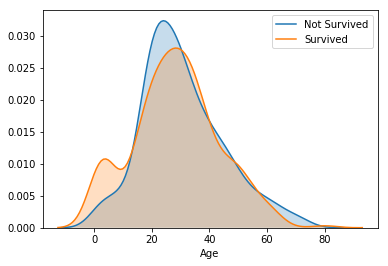

In [95]:
g = sns.kdeplot(train['Age'][(train['Survived']==0) & (train['Age'].notnull())], shade=True)
g = sns.kdeplot(train['Age'][(train['Survived']==1) & (train['Age'].notnull())], shade=True)
g.set_xlabel('Age')
g =g.legend(['Not Survived', 'Survived'])

In [96]:
df['Fare'].isnull().sum()
print(df[df['Fare'].isnull()])
df['Fare'].head(5)

     Pclass                Name   Sex   Age  SibSp  Parch Ticket  Fare Cabin  \
152       3  Storey, Mr. Thomas  male  60.5      0      0   3701   NaN   NaN   

    Embarked  
152        S  


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [97]:
df['Fare'] =df.groupby('Pclass')["Fare"].transform(lambda x:x.fillna(x.median()))

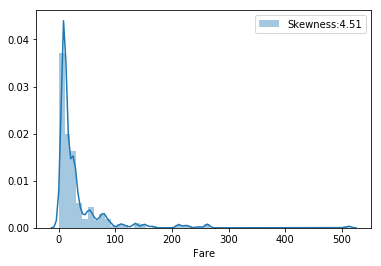

In [98]:
g = sns.distplot(df['Fare'], label = "Skewness:%.2f"%(df['Fare'].skew()))
g = g.legend()

In [99]:
df['Fare'] = df['Fare'].map(lambda j:np.log(j) if j>0 else 0)

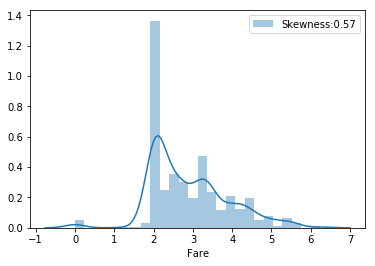

In [100]:
g = sns.distplot(df['Fare'], label = "Skewness:%.2f"%(df['Fare'].skew()))
g = g.legend()

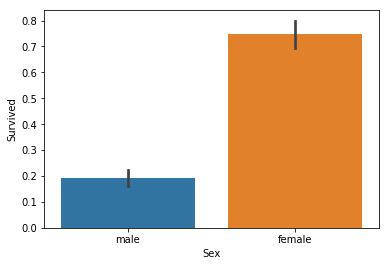

In [101]:
g = sns.barplot(x='Sex', y='Survived', data=train)

In [102]:
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


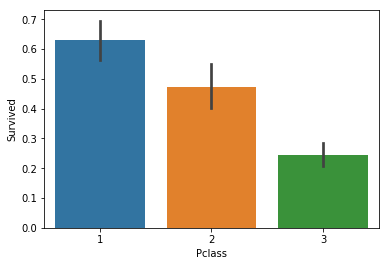

In [103]:
g=sns.barplot(x='Pclass', y='Survived', data =train)

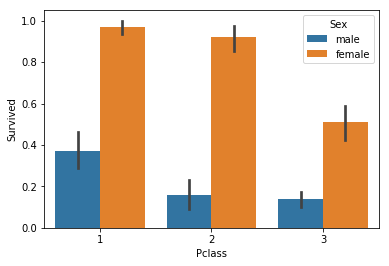

In [104]:
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

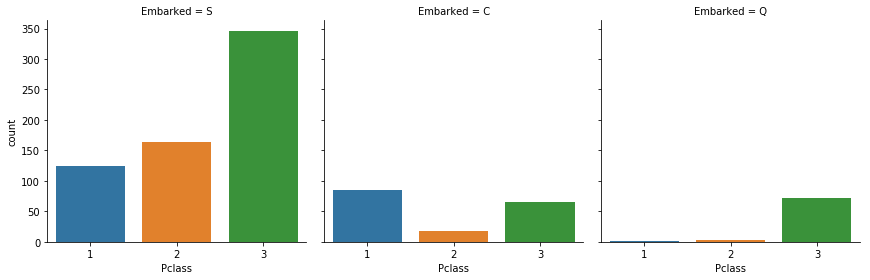

In [105]:
g= sns.factorplot(x='Pclass', col = 'Embarked', data=train, kind='count')

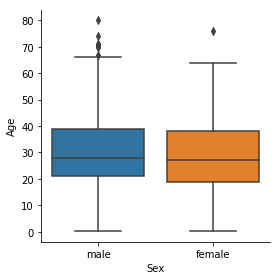

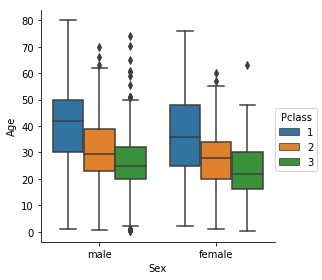

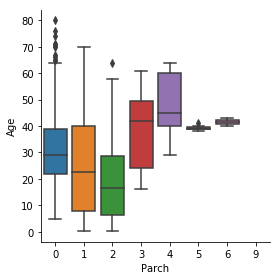

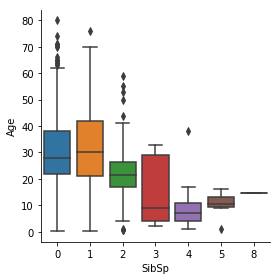

In [106]:
g= sns.factorplot(y='Age', x='Sex', data=df, kind='box')
g= sns.factorplot(y='Age', x='Sex',hue='Pclass', data=df, kind='box')
g= sns.factorplot(y='Age', x='Parch', data=df, kind='box')
g= sns.factorplot(y='Age', x='SibSp', data=df, kind='box')

Converting the categorical values into binary variables

In [107]:
from sklearn.preprocessing import LabelEncoder
o = LabelEncoder()
df['Sex']=o.fit_transform(df['Sex'])

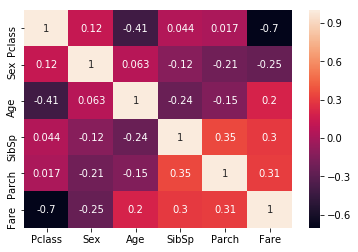

In [108]:
sns.heatmap(df.corr(), annot=True)

Filling the missing values of the Age by taking the groups of SibSp, Parch, Pclass and then by using the Median

In [109]:
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].iloc[i] = age_pred
    else :
        df['Age'].iloc[i] = age_med

In [110]:
df['Age'] = df['Age'].fillna(df['Age'].median())

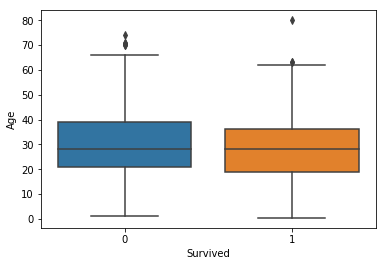

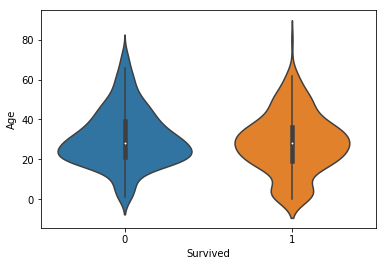

In [111]:
g= sns.boxplot(y='Age', x='Survived', data =train)
plt.figure()
g= sns.violinplot(y='Age', x='Survived', data =train)

Extracting the titles of the passengers from the Names

In [112]:
df_title = [i.split(',')[1].split('.')[0].strip() for i in df['Name']]
df['Title'] = pd.Series(df_title)
df['Title'].head(5)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

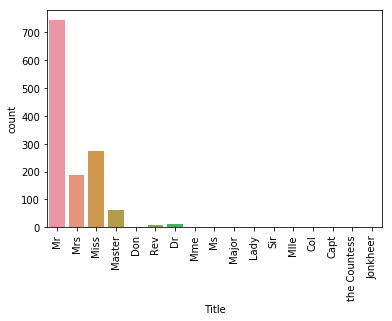

In [113]:
g = sns.countplot(x='Title',data=df)
g = plt.setp(g.get_xticklabels(), rotation = 90)

In [114]:
pd.value_counts(df['Title'].values)

Mr              744
Miss            274
Mrs             186
Master           60
Dr               10
Rev               9
Major             2
Col               2
Mme               2
Mlle              2
Don               2
Jonkheer          1
Capt              1
Ms                1
the Countess      1
Sir               1
Lady              1
dtype: int64

In [115]:
df['Title'].nunique()

17

In [116]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess', 'Capt', 'Col',
                                   'Don','Dr', 'Major', 'Rev', 'Sir',
                                  'Jonkheer'], 'Rare')
df['Title'] =df['Title'].map({'Master':0, 'Mrs':1, 'Miss':1, 'Mlle':1, 'Ms':1,
                             'Mme':1, 'Mr':2, 'Rare':3})
df['Title'] = df['Title'].astype(int)

In [117]:
pd.value_counts(df['Title'].values)

2    744
1    465
0     60
3     30
dtype: int64

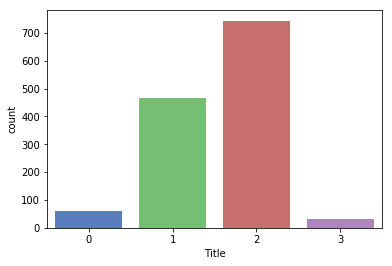

In [118]:
sns.countplot(df['Title'], palette = 'muted')

In [119]:
df.drop('Name', axis =1, inplace =True)

In [120]:
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,1,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,1,0,38.0,1,0,PC 17599,4.266662,C85,C,1
2,3,0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,1,0,35.0,1,0,113803,3.972177,C123,S,1
4,3,1,35.0,0,0,373450,2.085672,NaN,S,2


Adding the New variable such as Familysize which is sum of Parch, SibSp and The person himself

In [121]:
df['Fsize'] = df['SibSp'] + df['Parch'] + 1

In [122]:
df = pd.get_dummies(df, columns = ['Title'])
df = pd.get_dummies(df, columns = ['Embarked'], prefix ='Embark')

In [123]:
df.head(5)
df.shape

(1299, 16)

In [124]:
df['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'X' for i in df['Cabin'])

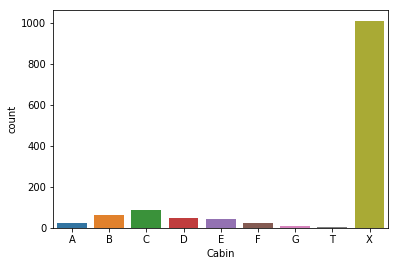

In [125]:
g = sns.countplot(df["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

In [126]:
Ticket = []
for i in list(df.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append("X")
        
df["Ticket"] = Ticket
df["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [127]:
df = pd.get_dummies(df, columns=['Ticket'], prefix='Tick')

In [128]:
df = pd.get_dummies(df, columns=['Cabin'], prefix ='cab')

In [129]:
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Fsize,Title_0,Title_1,Title_2,...,Tick_X,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_X
0,3,1,22.0,1,0,1.981001,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,4.266662,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,2.070022,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,3.972177,2,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,2.085672,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [130]:
x_train = df[:trainlength]
x_test = df[trainlength:]

### Model Building

In [131]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [141]:
kfold = StratifiedKFold(n_splits=5)

In [133]:
x_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Fsize,Title_0,Title_1,Title_2,...,Tick_X,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_X
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,...,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,2.307605,0.649262,28.856003,0.455165,0.363224,2.874014,1.818388,0.043133,0.347333,0.583428,...,0.746879,0.017026,0.053348,0.063564,0.037457,0.036322,0.014756,0.004540,0.001135,0.771850
std,0.835055,0.477472,12.216555,0.871571,0.791839,0.988903,1.382086,0.203271,0.476393,0.493271,...,0.435047,0.129442,0.224855,0.244113,0.189988,0.187197,0.120643,0.067267,0.033691,0.419878
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,2.066331,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,2.670985,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,34.000000,1.000000,0.000000,3.417727,2.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,6.238967,8.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
print(trainlength)
x_train.shape
y_train.shape
x_test.shape

881


(418, 60)

In [144]:
gsadaDTC.best_score_

0.7843359818388195

In [173]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300, 500],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 10, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    3.2s
[Parallel(n_jobs=10)]: Done 209 tasks      | elapsed:   13.4s
[Parallel(n_jobs=10)]: Done 405 out of 405 | elapsed:   27.8s finished


0.8286038592508513

In [172]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150, 200],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 10, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  60 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed:    6.9s finished


0.8138479001135074

In [171]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1,100],
                  'C': [0.001,1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 10, verbose = 1)

gsSVMC.fit(x_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    6.2s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    7.1s finished


0.8195232690124858

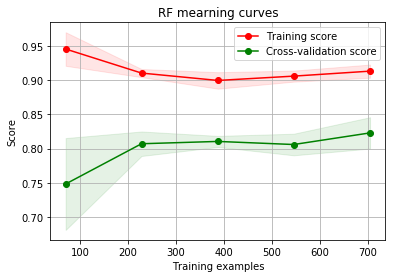

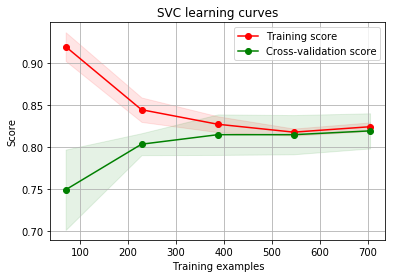

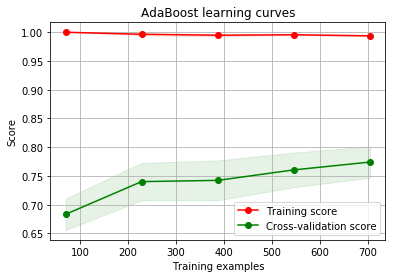

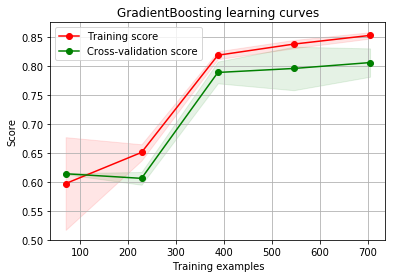

In [149]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",x_train,y_train,cv=kfold)


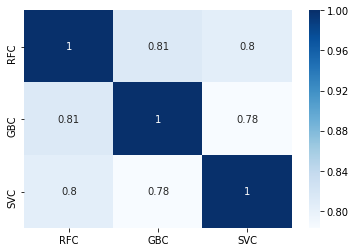

In [174]:
test_Survived_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(x_test), name="SVC")
test_Survived_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True, cmap ='Blues')

In [175]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), 
                                       ('svc', SVMC_best), ('gbc',GBC_best)],
                           voting='soft', n_jobs=4)

votingC = votingC.fit(x_train, y_train)

In [177]:
test_Survived = pd.Series(votingC.predict(x_test), name="Survived")

results = pd.concat([test_Survived],axis=1)

results.to_csv("sub.csv",index=False)